In [13]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [14]:
# Read CSV, parse dates, and set index
df = pd.read_csv((r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 10\2\05-Ins_ARIMA\Resources\AirPassengers.csv'),
                 parse_dates=True, 
                 index_col='Month', 
                 infer_datetime_format=True)
df.head()

,NumberPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


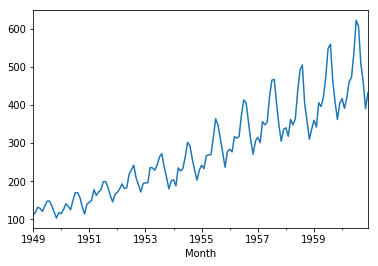

In [16]:
# Plot number of passengers
df["NumberPassengers"].plot()

# Autocorrelation and Partial Autocorrelation Analysis

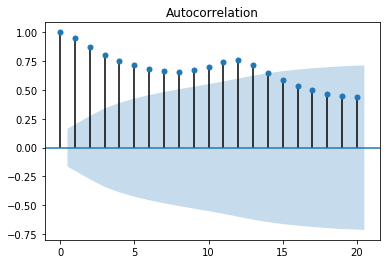

In [17]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df,
         lags=20);

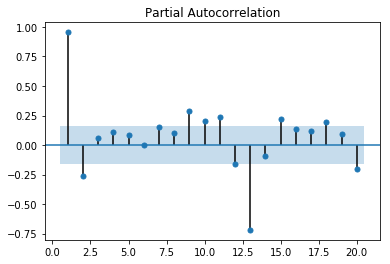

In [18]:
# Plot PACF
plot_pacf(df,
          zero=False,
          lags=20);

# ARIMA Model

In [6]:
# Run ARIMA model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df["NumberPassengers"],
              order=(2, 1, 2))

C:\Users\TribThapa\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\TribThapa\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was p

In [7]:
# Fit the model
results = model.fit()

In [8]:
# Display model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.NumberPassengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.715
Date:                Thu, 15 Jul 2021   AIC                           1344.043
Time:                        20:31:54   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.5310      0.708      3.574      0.000       1.143       3.919
ar.L1.D.NumberPassengers     1.6477      0.033     49.932      0.000       1.583       1.712
ar.L2.D.NumberPassengers    -0.9094      0.033    -27.879      0.000      -0.973      -0.845
ma.L1.D.NumberPassengers    -1.9097      0.065    -29.521      0.000      -2.037      -1.783
ma.L2.D.NumberPassengers     0.9996      0.067     14.814      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9553           -0.2965j            1.0002           -0.0479
MA.2            0.9553           +0.2965j            1.0002            0.0479
-----------------------------------------------------------------------------
"""

In [20]:
pd.DataFrame(results.forecast(steps=5))

,0,1,2,3,4
0,433.131,450.912,479.844,512.008,539.357
1,24.7153,30.7171,32.2424,32.2915,32.5094
2,"[384.6902230151866, 481.5722449146796]","[390.70783527849096, 511.1167737576876]","[416.6502215681607, 543.0379634464944]","[448.7178127814624, 575.2980331963255]","[475.63972481319263, 603.0740536403265]"


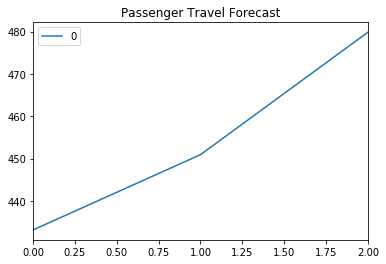

In [9]:
# Visualize the forecast
pd.DataFrame(results.forecast(steps=3)[0]).plot(title="Passenger Travel Forecast")

In [10]:
# A second model with a different order
model2 = ARIMA(df["NumberPassengers"],
               order=(2, 1, 4))

C:\Users\TribThapa\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\TribThapa\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was p

In [11]:
# Fit the model
results2 = model2.fit()

C:\Users\TribThapa\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [12]:
# Display model summary
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.NumberPassengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -661.292
Method:                       css-mle   S.D. of innovations             23.715
Date:                Thu, 15 Jul 2021   AIC                           1338.585
Time:                        20:31:56   BIC                           1362.288
Sample:                    02-01-1949   HQIC                          1348.216
                         - 12-01-1960                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.6854      0.134     19.980      0.000       2.422       2.949
ar.L1.D.NumberPassengers     0.9143      0.082     11.140      0.000       0.753       1.075
ar.L2.D.NumberPassengers    -0.7710      0.080     -9.637      0.000      -0.928      -0.614
ma.L1.D.NumberPassengers    -0.8356      0.101     -8.269      0.000      -1.034      -0.638
ma.L2.D.NumberPassengers     0.3272      0.122      2.691      0.007       0.089       0.565
ma.L3.D.NumberPassengers     0.3086      0.114      2.699      0.007       0.085       0.533
ma.L4.D.NumberPassengers    -0.7999      0.079    -10.112      0.000      -0.955      -0.645
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5929           -0.9723j            1.1389           -0.1628
AR.2            0.5929           +0.9723j            1.1389            0.1628
MA.1            1.0001           -0.0000j            1.0001           -0.0000
MA.2            0.3179           -0.9481j            1.0000           -0.1985
MA.3            0.3179           +0.9481j            1.0000            0.1985
MA.4           -1.2500           -0.0000j            1.2500           -0.5000
-----------------------------------------------------------------------------
"""